In [4]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
# Read the data file
sal_data = pd.read_excel("/content/sample_data/Levels_Fyi_Salary_Data.xlsx")
sal_data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [7]:
print("Total missing values:")
sal_data.isnull().sum().sum()

Total missing values:


115515

In [8]:
#Plot the data for each year
sal_data.timestamp = pd.to_datetime(sal_data.timestamp)
sal_data.timestamp
year = sal_data.timestamp.dt.year
year_counts = year.value_counts()
year_counts

2020    23946
2021    23427
2019    11189
2018     3895
2017      185
Name: timestamp, dtype: int64

In [9]:
import missingno as msno
#Plot the titles
def descriptive_analysis(df, allColsExists):
  fig, ax =plt.subplots(nrows = 8,ncols = 2, figsize = (20,50))

  sns.countplot(y='title', data = df, color = 'blue', ax = ax[0,0])
  
  # Plot the Education
  sns.countplot(x='Education',data = df, ax = ax[0,1])

  # Plot the location
  sns.countplot(y='location',data = df, ax=ax[1,0],
                order=df.location.value_counts().iloc[:10].index)
    
  #Plot the years of experience
  sns.histplot(x="yearsofexperience", bins=range(0,35), data=df, ax = ax[1,1]) 
    
  #Plot the years of experience
  sns.barplot(x=year_counts.index,y = year_counts.values, data=df, ax = ax[2,0]) 
    
  sns.scatterplot(y = sal_data.title , x= sal_data.totalyearlycompensation, ax=ax[2,1])

  sns.boxplot(data = df, x ='totalyearlycompensation', ax=ax[3,0])
  sns.boxplot(data = df, x ='yearsofexperience', ax=ax[3,1])
  sns.boxplot(data = df, x ='yearsofexperience', y ='totalyearlycompensation', ax=ax[4,0])
  if(allColsExists == True):  
   # Plot the Race
   sns.countplot(x='Race',data = df, ax = ax[4,1])
    
   # Plot the gender
   sns.countplot(x='gender',data = df, ax = ax[5,0])
    
   #Correlation Matrix and Heatmap
   sns.heatmap(df.corr(), annot=True, ax = ax[5,1]) 
    
   #sns.histplot(data=df.isna().melt(value_name="missing"), x="variable",hue="missing",multiple="fill", aspect=1.25, ax=[6,0]) 
   sns.heatmap(df.isna().transpose(),cmap="YlGnBu", cbar_kws={'label': 'Missing Data'}, ax = ax[6,0]) 
    
   #Heatmap of missing values
   msno.heatmap(sal_data, ax = ax[6,1]) 
    
   #faang = df.query("company in ('Facebook','Amazon','Apple','Netflix','Google') and title in ('Data Scientist','Software Engineer')  and yearsofexperience>4 and yearsofexperience<16and totalyearlycompensation < 1000")
                    
   #sns.violinplot(data=faang, palette="Set3", x ='company',hue='title', y='totalyearlycompensation',ax = ax[7,0])

   # Save the full figure...
   fig.savefig('full_figure_pre_cleaning.png') 
  else: 
   # Save the full figure...
   fig.savefig('full_figure_post_cleaning.png')
  

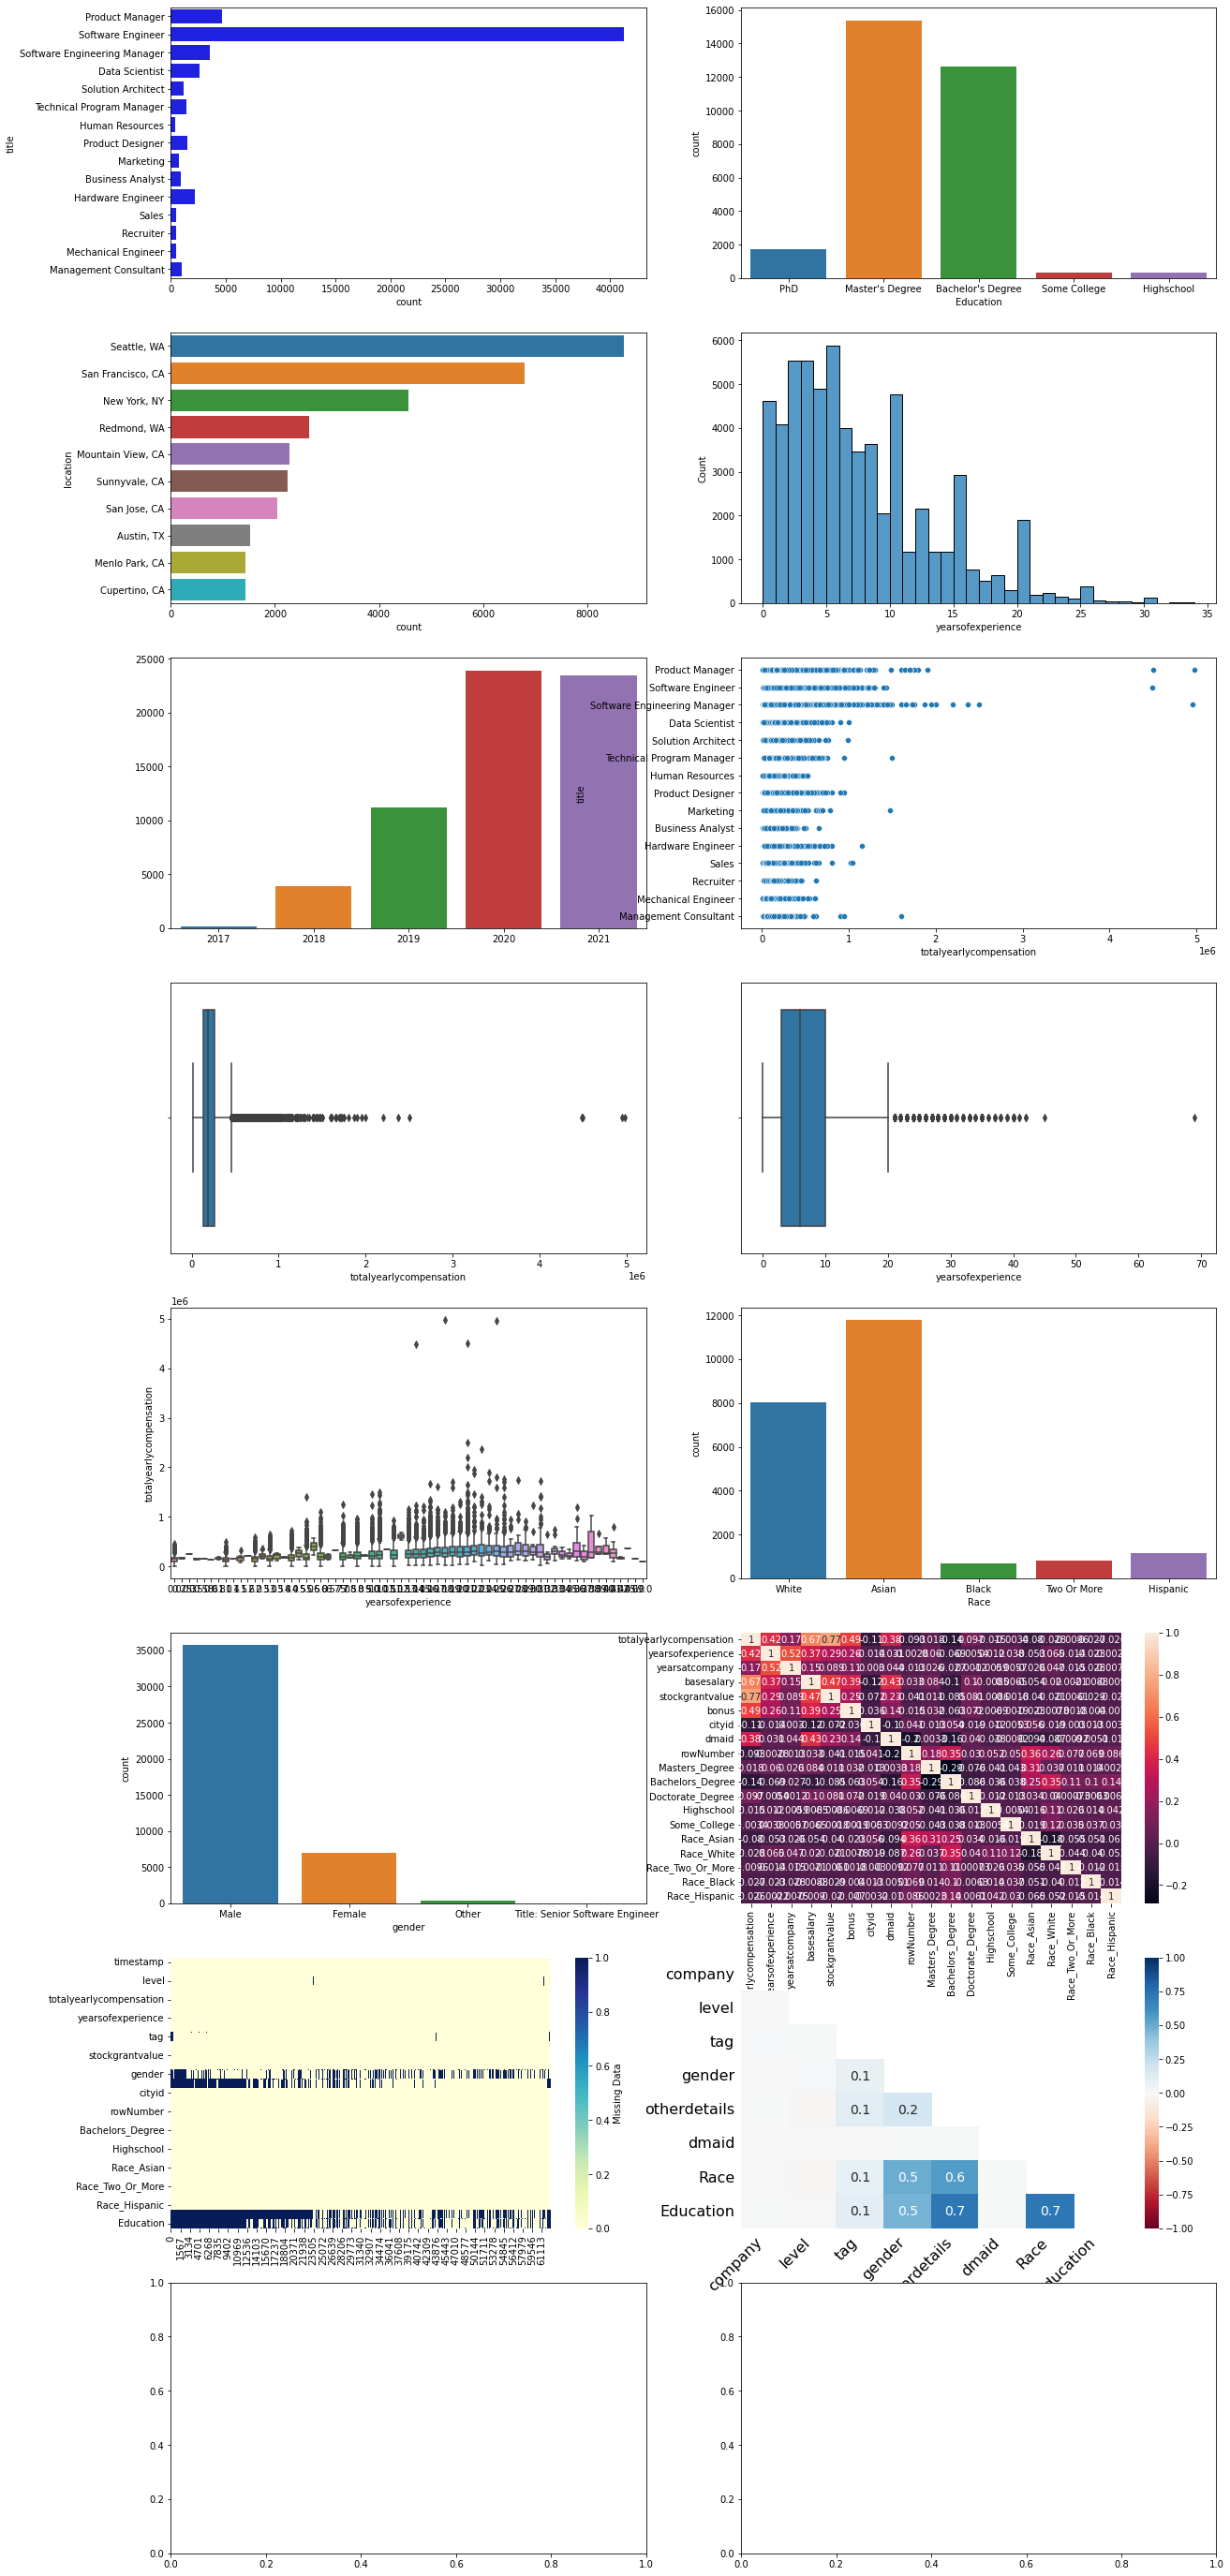

In [10]:
descriptive_analysis(sal_data, True)

In [11]:
#Percentage of missing values
missingcount= sal_data.isnull().sum()
round((missingcount/len(sal_data))*100,2)

timestamp                   0.00
company                     0.01
level                       0.19
title                       0.00
totalyearlycompensation     0.00
location                    0.00
yearsofexperience           0.00
yearsatcompany              0.00
tag                         1.36
basesalary                  0.00
stockgrantvalue             0.00
bonus                       0.00
gender                     31.19
otherdetails               35.93
cityid                      0.00
dmaid                       0.00
rowNumber                   0.00
Masters_Degree              0.00
Bachelors_Degree            0.00
Doctorate_Degree            0.00
Highschool                  0.00
Some_College                0.00
Race_Asian                  0.00
Race_White                  0.00
Race_Two_Or_More            0.00
Race_Black                  0.00
Race_Hispanic               0.00
Race                       64.20
Education                  51.52
dtype: float64

**************************************Data Cleaning**********************************
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

In [12]:
#Drop the unrelevant records from our dataset.
#i.e the records that are not part of the study
titles = ['Human Resources',
          'Management Consultant',
          'Marketing',
          'Mechanical Engineer',
          'Recruiter',
          'Sales'] 
sal_data_cleaned = sal_data[~sal_data["title"].isin(titles)]   
#inspect the row counts
sal_data_cleaned.count()

timestamp                  59190
company                    59185
level                      59085
title                      59190
totalyearlycompensation    59190
location                   59190
yearsofexperience          59190
yearsatcompany             59190
tag                        58350
basesalary                 59190
stockgrantvalue            59190
bonus                      59190
gender                     40994
otherdetails               37500
cityid                     59190
dmaid                      59188
rowNumber                  59190
Masters_Degree             59190
Bachelors_Degree           59190
Doctorate_Degree           59190
Highschool                 59190
Some_College               59190
Race_Asian                 59190
Race_White                 59190
Race_Two_Or_More           59190
Race_Black                 59190
Race_Hispanic              59190
Race                       20702
Education                  28321
dtype: int64

Remove the rows with missing values in fields 'company', 'level','totalyearlycompensation'
as they are the most relevant fields in our study

In [13]:
#Drop the unrelevant fields from our dataset.
sal_data_cleaned = sal_data_cleaned.drop(columns = 
                         ['gender', 'otherdetails','dmaid','rowNumber','Masters_Degree',
                          'Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian',
                          'Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','Race'])
sal_data_cleaned.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,20000.0,10000.0,7392,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,0.0,7419,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,0.0,11527,NaN
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,180000.0,35000.0,7472,NaN
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,0.0,7322,NaN


Inspect the count of unique values in our dataset

In [14]:
sal_data_cleaned = sal_data_cleaned.dropna(subset=['company', 'level','totalyearlycompensation'])

In [15]:
sal_data_cleaned['Education'].fillna('Unknown', inplace = True) 
sal_data_cleaned['Education'] = sal_data_cleaned['Education'].replace(['Some College'],'Highschool')
sal_data_cleaned['Education'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unknown              30814
Master's Degree      14479
Bachelor's Degree    11513
PhD                   1647
Highschool             627
Name: Education, dtype: int64

In [16]:
def ConverttoUpper(df,field):
  distinct_values = pd.unique(df[field])
  print("count of distinct "+ field + " name before:" +str(len(distinct_values)))
  #not working
  #sal_data_cleaned['company'] = map(lambda x: str(x).upper(), sal_data_cleaned['company'])

  df[field] = df[field].str.upper()
  df[field]
    
  distinct_values = pd.unique(df[field])
  print("count of distinct company name after converting to upper:" +str(len(distinct_values)))
    
ConverttoUpper(sal_data_cleaned,'company')

count of distinct company name before:1596
count of distinct company name after converting to upper:1097


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
#ref : https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
import numpy as np
def IdentifyCorrelation(df, threshold):
    cor_matrix = df.corr().abs()
    print(cor_matrix)
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
    print(upper_tri)
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print("\n*******Highly correlated fields***********"); 
    print(to_drop)
    #df1 = df.drop(df.columns[to_drop], axis=1)
    #print(df1.head())
    #return df1
#sal_data_cleaned = IdentifyCorrelation(sal_data_cleaned, 0.7) 

In [18]:
#from scipy.stats import chisquare
#chisquare(sal_data_cleaned)
#ref: https://pyshark.com/skewness-in-python/
#from scipy.stats import skew
#print(skew(sal_data_cleaned['totalyearlycompensation']))

In [19]:
sal_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59080 entries, 0 to 62641
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                59080 non-null  datetime64[ns]
 1   company                  59080 non-null  object        
 2   level                    59080 non-null  object        
 3   title                    59080 non-null  object        
 4   totalyearlycompensation  59080 non-null  int64         
 5   location                 59080 non-null  object        
 6   yearsofexperience        59080 non-null  float64       
 7   yearsatcompany           59080 non-null  float64       
 8   tag                      58243 non-null  object        
 9   basesalary               59080 non-null  int64         
 10  stockgrantvalue          59080 non-null  float64       
 11  bonus                    59080 non-null  float64       
 12  cityid                   59080 n

**********Data Transformation and feature reduction***********
Encode the categorical data
Feature scaling via Normalization or Standardization
Dimensionality Reduction / Factor Analysis for factor reduction

In [20]:
thislist = ["company", "title","tag", "level","cityid","location","Education"]
for x in thislist:
  unique_values =  pd.unique(sal_data_cleaned[x])
  print("********************")
  print(x + ":" +str(len(unique_values)))
  print("********************")
  print(unique_values)
  print("\n")

********************
company:1097
********************
['ORACLE' 'EBAY' 'AMAZON' ... 'SYNOLOGY' 'APPIER' 'PEGATRON']


********************
title:9
********************
['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Product Designer' 'Business Analyst' 'Hardware Engineer']


********************
tag:2445
********************
[nan 'Full Stack' 'Distributed Systems (Back-End)' ... 'Solution Mgt'
 'Software Infra' 'Industry Cloud']


********************
level:2732
********************
['L3' 'SE 2' 'L7' ... 'L6 (Staff)' 'Mts 1' 'Bioinformatics Scientist II']


********************
cityid:999
********************
[ 7392  7419 11527  7472  7322 11521 11470  7300 12008  7158 10182  7277
  4015  8909  7408 10500  4878 12794  7422  4058  3444  7351 11497 40303
  1320 10965  8816  7416  8774  7434  7229 10648  7430  7275  7193 10726
  1384  7157 11412 10522  7534  7369  7199 10485  1265  8893 10646  8399

In [21]:
tag_categories = sal_data['tag'].unique()

print('tag categories are: \n',len(tag_categories),'\n')
for val in tag_categories:
    print(val)

tag categories are: 
 3059 

nan
Full Stack
Distributed Systems (Back-End)
Embedded Systems
API Development (Back-End)
DevOps
Data Analysis
Web Development (Front-End)
ML / AI
Security
Mobile (iOS + Android)
iOS
Product Support
Systems software
c++
Kernel, Storage
Networking
SRE
System SW
Android
Mechanical Engineering
Cloud
Testing (SDET)
Alexa
Data Engineering
Infrastructure
Backend Tools
IT
Embedded
QA / Testing
Big Data
BD
Games
Embedded Software
Front end app development
PM
Aws
Product
AWS
System Programming
Program Manager
special
Logistics
Machine Learning
Surface
App development
Data
Marketing
WDG
Iot
Retail
Desktop
Design
Firmware
Rendering
General
Design Verification
All
Business Development
Performance Engineering
Healthcare
Human Resources
UI/UX
Interaction Design
Gaming
Embedded System
ASIC
ASIC HW verification
ASIC HW
OS
Azure
Multimedia
Power
Product management
product management
Product Management
Analytics
Systems
SWE
Pm
Dad
Architecture
Management
Infra
devices
Asic
C

In [22]:
data_eng_roles = [
    'ML / AI',
    'Data',
    'ML/AI Engineering (Not Model Development)',
    'Full stack, data engineering, ml',
    'Data Analysis',
    'Data analytics',
    'Algorithms',
    'Data Science',
    'Algorithm',
    'Analytics',
    'Systems/ML',
    'Tensorflow',
    'Algorithm Prototyping',
    'Analytics Data Warehouse',
    'Data Analytics / Business Intelligence',
    'Artificial intelligence',
    'NLP',
    'Data Analytics Infra',
    'Algorithm Modeling',
    'ML',
    'Algorithm and driver development'
 ]

tag_implies_data_engineer = sal_data_cleaned["tag"].isin(data_eng_roles)
sal_data_cleaned[tag_implies_data_engineer].count()   

 
#inspect the row counts
#sal_data_cleaned.count()


timestamp                  6000
company                    6000
level                      6000
title                      6000
totalyearlycompensation    6000
location                   6000
yearsofexperience          6000
yearsatcompany             6000
tag                        6000
basesalary                 6000
stockgrantvalue            6000
bonus                      6000
cityid                     6000
Education                  6000
dtype: int64

In [23]:
title_implies_se = sal_data_cleaned["title"] != "Data Scientist"
sal_data_cleaned[title_implies_se].count()

timestamp                  56508
company                    56508
level                      56508
title                      56508
totalyearlycompensation    56508
location                   56508
yearsofexperience          56508
yearsatcompany             56508
tag                        55676
basesalary                 56508
stockgrantvalue            56508
bonus                      56508
cityid                     56508
Education                  56508
dtype: int64

In [24]:
sal_data_cleaned[title_implies_se & tag_implies_data_engineer]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,Education
436,2018-06-07 16:48:58,IBM,Associate Offering Manager (Band 6),Product Manager,103000,"Austin, TX",0.0,0.0,ML / AI,0,0.0,0.0,10965,Unknown
443,2018-06-08 15:43:51,GOOGLE,L3,Software Engineer,138000,"Seattle, WA",0.0,0.0,ML / AI,94000,30000.0,14000.0,11527,Unknown
463,2018-06-11 19:43:25,MICROSOFT,63,Product Manager,350000,"Sunnyvale, CA",8.0,1.0,ML / AI,0,0.0,0.0,7472,Unknown
465,2018-06-12 07:46:01,GOOGLE,L4,Software Engineer,257000,"New York, NY",7.0,1.0,ML / AI,156000,78000.0,23000.0,10182,Unknown
470,2018-06-13 12:02:58,LINKEDIN,Senior,Software Engineer,284000,"Sunnyvale, CA",10.0,0.0,ML / AI,190000,300000.0,19000.0,7472,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62516,2018-06-08 08:22:33,MICROSOFT,59,Software Engineer,173000,"Redmond, WA",0.0,0.0,ML / AI,108000,30000.0,35000.0,11521,Unknown
62577,2018-07-14 09:40:59,PINTEREST,4,Software Engineer,333000,"San Francisco, CA",3.0,1.0,ML / AI,168000,140549.0,24000.0,7419,Unknown
62619,2018-08-15 17:50:26,MICROSOFT,59,Product Manager,253000,"Seattle, WA",0.0,0.0,ML / AI,108000,120000.0,25000.0,11527,Unknown
62628,2018-08-26 09:59:54,MICROSOFT,60,Product Manager,171000,"Bellevue, WA",1.0,1.0,ML / AI,116000,42850.0,12500.0,11470,Unknown


In [25]:
sal_data_cleaned.loc[(title_implies_se & tag_implies_data_engineer),'title']='Data Scientist'

In [26]:
sal_data_cleaned[tag_implies_data_engineer].title.unique()

array(['Data Scientist'], dtype=object)

In [27]:
company_amzn = [
    'Amazon.com',
    'Aws',
    'AWS',
    'Amazon web services',
    'Amazon Web Services',
    'AMAZON',
    'AMazon',
    'Amazon',
    'amazon'
 ]

company_implies_company_amzn = sal_data_cleaned["company"].isin(company_amzn)
sal_data_cleaned[company_implies_company_amzn].count()   

timestamp                  7870
company                    7870
level                      7870
title                      7870
totalyearlycompensation    7870
location                   7870
yearsofexperience          7870
yearsatcompany             7870
tag                        7687
basesalary                 7870
stockgrantvalue            7870
bonus                      7870
cityid                     7870
Education                  7870
dtype: int64

In [28]:
sal_data_cleaned.loc[(company_implies_company_amzn),'company']='Amazon'

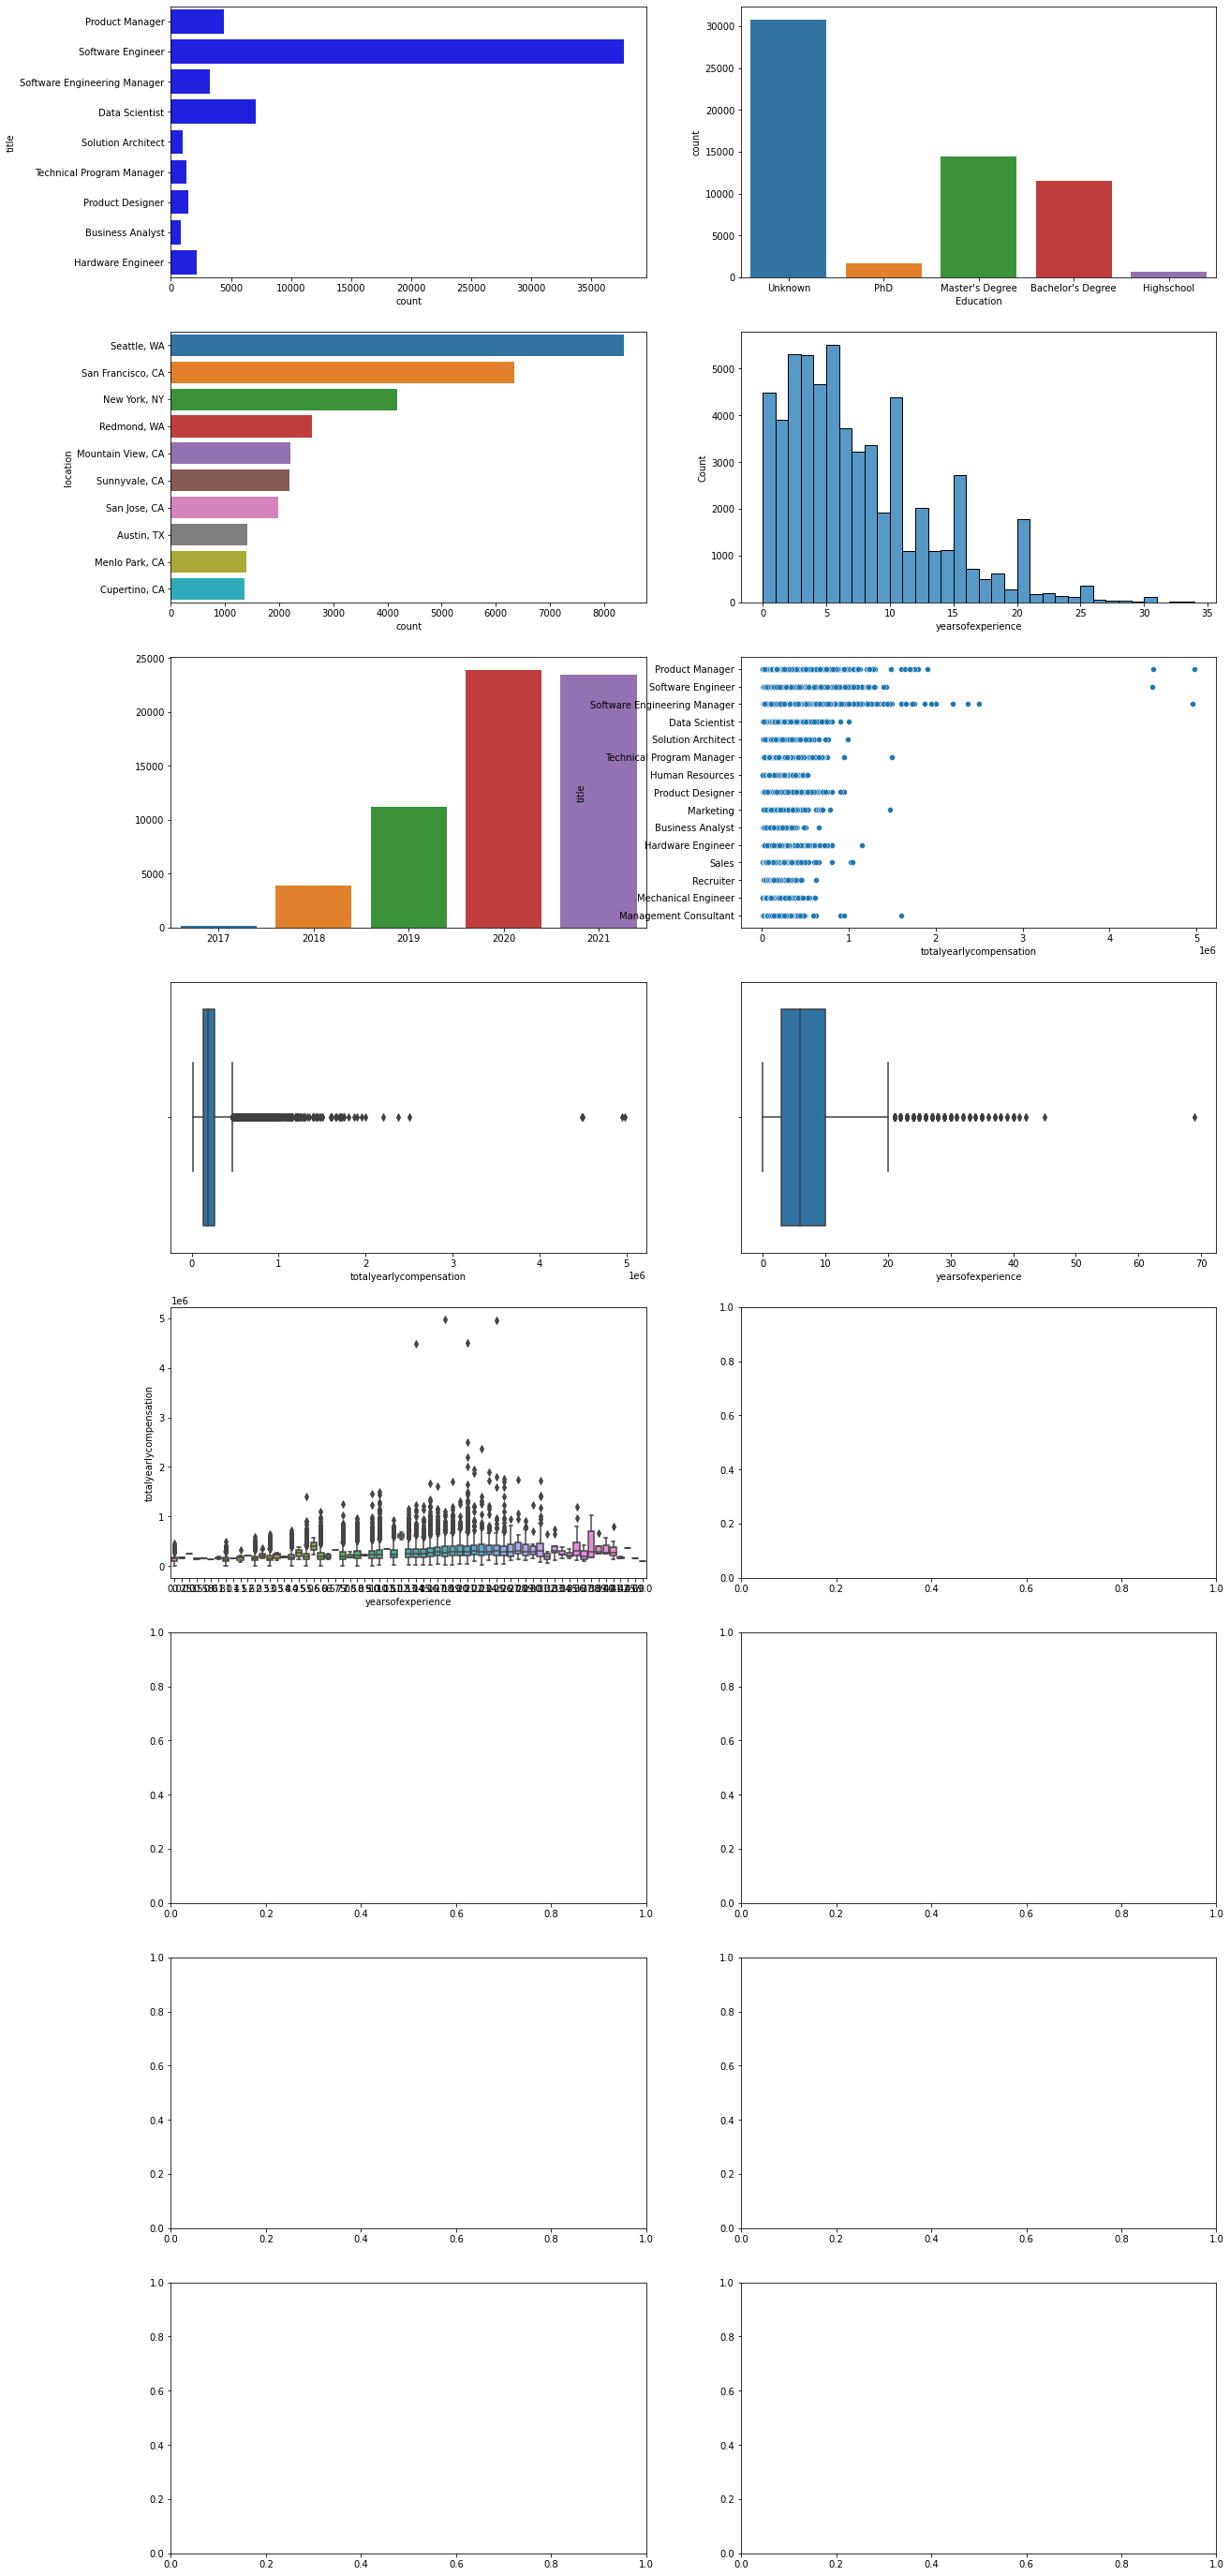

In [29]:
descriptive_analysis(sal_data_cleaned, False)

In [30]:
# create excel writer object
writer = pd.ExcelWriter('SalaryDataCleaned.xlsx')
# write dataframe to excel
sal_data_cleaned.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [31]:
sal_data_transform = pd.read_excel("SalaryDataCleaned.xlsx")

In [32]:
sal_data_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59080 entries, 0 to 59079
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               59080 non-null  int64         
 1   timestamp                59080 non-null  datetime64[ns]
 2   company                  59080 non-null  object        
 3   level                    59080 non-null  object        
 4   title                    59080 non-null  object        
 5   totalyearlycompensation  59080 non-null  int64         
 6   location                 59080 non-null  object        
 7   yearsofexperience        59080 non-null  float64       
 8   yearsatcompany           59080 non-null  float64       
 9   tag                      58243 non-null  object        
 10  basesalary               59080 non-null  int64         
 11  stockgrantvalue          59080 non-null  float64       
 12  bonus                    59080 n

In [33]:
def encode_categorical_variables(df):
    fieldstoencode = ["title","Education","company"]
    for field in fieldstoencode:
        print("******Encoding " + field + " ***********")
        le = LabelEncoder()
        sal_data_transform[field]=sal_data_transform[[field]].apply(le.fit_transform)

        le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_mapping)
        
encode_categorical_variables(sal_data_transform)

******Encoding title ***********
{'Business Analyst': 0, 'Data Scientist': 1, 'Hardware Engineer': 2, 'Product Designer': 3, 'Product Manager': 4, 'Software Engineer': 5, 'Software Engineering Manager': 6, 'Solution Architect': 7, 'Technical Program Manager': 8}
******Encoding Education ***********
{"Bachelor's Degree": 0, 'Highschool': 1, "Master's Degree": 2, 'PhD': 3, 'Unknown': 4}
******Encoding company ***********
{'10X GENOMICS': 0, '23ANDME': 1, '2U': 2, '3M': 3, '7-ELEVEN': 4, '8X8': 5, 'ABB': 6, 'ABBOTT': 7, 'ACCENTURE': 8, 'ACORNS': 9, 'ACQUIA': 10, 'ACTIONIQ': 11, 'ACTIVECAMPAIGN': 12, 'ACTIVISION': 13, 'ADDEPAR': 14, 'ADEVINTA': 15, 'ADIDAS': 16, 'ADOBE': 17, 'ADP': 18, 'ADYEN': 19, 'AETNA': 20, 'AFFIRM': 21, 'AFTERPAY': 22, 'AGODA': 23, 'AIG': 24, 'AIRBNB': 25, 'AIRBUS': 26, 'AIRTABLE': 27, 'AIRTEL INDIA': 28, 'AKAMAI': 29, 'AKAMAI TECHNOLOGIES': 30, 'AKUNA CAPITAL': 31, 'ALARM.COM': 32, 'ALASKA AIRLINES': 33, 'ALATION': 34, 'ALBERTSONS': 35, 'ALGOLIA': 36, 'ALIBABA': 37, 

In [34]:
# Split the dataset into train and test sets

training_data, testing_data = train_test_split(sal_data_transform, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 47264
No. of testing examples: 11816


Generally speaking, best practice is to use only the training set to figure out how to scale / normalize, 
then blindly apply the same transform to the test set.
Example:
scaled_train =  (train - train_mean) / train_std_deviation
scaled_test = (test - train_mean) / train_std_deviation
Ref: https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data

In [35]:
#sal_data_transform_scaled = training_data[['company','title','totalyearlycompensation',
#                                           'yearsofexperience','yearsatcompany','cityid','Education']].copy()
#sal_data_transform_scaled
#sal_data_transform_scaled = RobustScaler().fit_transform(sal_data_transform_scaled)
#sal_data_transform_scaled = pd.DataFrame(sal_data_transform_scaled,
#                                         columns=['Company','Title','TotalYearlyCompensation',
#                                                  'Yearsofexperience','Yearsatcompany','Cityid','Education'])
#sal_data_transform_scaled.describe()

In [36]:
#To be verified - not working
#descriptive_analysis(sal_data_transform_scaled, True)

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
Ref: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [37]:
#ref : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
#from sklearn.model_selection import StratifiedShuffleSplit
#    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
#    sss.get_n_splits(X,y)
#    print(sss)
#    for train_index, test_index in sss.split(X, y):
#      print("TRAIN:", train_index, "TEST:", test_index)
#      X_train, X_test = X[train_index], X[test_index]
#      y_train, y_test = y[train_index], y[test_index]

In [38]:
# Define a function to set up the data into input and output variables
def data_setter(training_data):
    
    # Create a list of features from the training data to use for modelling
    feature_list = list(training_data.columns.values.tolist())
    feature_list.remove('totalyearlycompensation')
    
    # Assign values to X and y variables
    X = training_data[feature_list]
    y = training_data['totalyearlycompensation']
    print(feature_list)

    # Split the training data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Return outputs for use in other functions
    return X, y, X_train, X_test, y_train, y_test     

# Define a function for feature selection
def data_selection(training_data):

  #  training_data_selected = training_data[['company','title','totalyearlycompensation','yearsofexperience','yearsatcompany','cityid','Education']].copy()
    training_data_selected = training_data[['totalyearlycompensation','Education']].copy() 
    # Return outputs for use in other functions
    return training_data_selected
    
# Define a function for feature scaling    
def data_scale(X_train,X_test):
    
     #Fit scaler of training set
    scaler = RobustScaler().fit(X_train)
  #  X_train = pd.DataFrame(X_train,columns=['company','title','yearsofexperience','yearsatcompany','cityid','Education'])
    
    # transform training data
    X_train_scaled = scaler.transform(X_train)

    # transform testing dataabs
    X_test_scaled = scaler.transform(X_test)
    
   # X_train_scaled.describe()
   # X_test_scaled.describe()
    
    # Return outputs for use in other functions
    return X_train_scaled,X_test_scaled
    
# Define a function for Linear Regression modeling    
def linear_reg(X_train, y_train, X_test, y_test):
    
     # Use Linear Regression as a model
    regressor = LinearRegression()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make prediction
    y_predict = regressor.predict(X_test)
    
    # The coefficients
    print("Coefficients: \n", regressor.coef_)
   
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
    
      # The Root mean squared error
    print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_predict, squared=False))

    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

    # Plot outputs
   # plt.scatter(X_test, y_test, color="black")
   # plt.plot(X_test, y_predict, color="blue", linewidth=3)

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()
    

In [39]:
# Define a function for Naive bias model    
def naive_bayes(X_train, y_train, X_test, y_test):
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print("Number of mislabeled points out of a total %d points : %d"
           % (X_test.shape[0], (y_test != y_pred).sum()))
    score = gnb.score(X_test, y_test)
    print("accuracy score:")
    print(score)

In [40]:
#import graphviz
from sklearn.metrics import accuracy_score
def decision_tree(X_train, y_train, X_test, y_test):
    from sklearn import tree
    clf = tree.DecisionTreeRegressor(max_depth=8)
    clf = clf.fit(X_train, y_train)
    #plt.figure(figsize=(30, 30)
    tree.plot_tree(clf)
    #plt.show()
    #dot_data = tree.export_graphviz(clf, out_file=None) 
    #graph = graphviz.Source(dot_data) 
    #graph
    #graph.render("dsc") 
    
    # Predict
    y_1 = clf.predict(X_test)
    y_1
    score = clf.score(X_test, y_test)
    print("accuracy score:")
    print(score)
    

In [41]:
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score
import numpy as np
def RidgeRegression(X_train, y_train, X_test, y_test):    
    f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
    # Use linear model
    regr = RidgeCV()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Plot results
    ax0.scatter(y_test, y_pred)
    ax0.plot([0, 2000], [0, 2000], "--k")
    ax0.set_ylabel("Target predicted")
    ax0.set_xlabel("True Target")
    ax0.set_title("Ridge regression \n without target transformation")
    ax0.text(
        100,
        1750,
        r"$R^2$=%.2f, MAE=%.2f"
        % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
    )
    ax0.set_xlim([0, 2000])
    ax0.set_ylim([0, 2000])
    # Transform targets and use same linear model
    regr_trans = TransformedTargetRegressor(
        regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1
    )
    regr_trans.fit(X_train, y_train)
    y_pred = regr_trans.predict(X_test)

    ax1.scatter(y_test, y_pred)
    ax1.plot([0, 2000], [0, 2000], "--k")
    ax1.set_ylabel("Target predicted")
    ax1.set_xlabel("True Target")
    ax1.set_title("Ridge regression \n with target transformation")
    ax1.text(
        100,
        1750,
        r"$R^2$=%.2f, MAE=%.2f"
        % (r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)),
    )
    ax1.set_xlim([0, 2000])
    ax1.set_ylim([0, 2000])

    f.suptitle("Synthetic data", y=0.035)
    f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [42]:
def main():
#Call a function to set up the data for modeling

        training_data_selected = data_selection(training_data)

        #split the data into test and train
        X, y, X_train, X_test, y_train, y_test = data_setter(training_data_selected)   
    
        #perform scaling
        X_train_scaled,X_test_scaled = data_scale(X_train,X_test)
        print("*****************X_train_scaled*****************")
        print(X_train_scaled)
        print("*****************X_test_scaled*****************")
        print(X_test_scaled)
        
        #try different models
        print("*****************linear regression*****************")
        linear_reg(X_train_scaled, y_train, X_test_scaled, y_test)
        
        print("*****************naive bayes*****************")
        naive_bayes(X_train_scaled, y_train, X_test_scaled, y_test)
        
        #print("*****************Ridge Regression*****************")
        #RidgeRegression(X_train_scaled, y_train, X_test_scaled, y_test)

        print("*****************decision tree*****************")
        decision_tree(X_train_scaled, y_train, X_test_scaled, y_test)
        

['Education']
*****************X_train_scaled*****************
[[-1.]
 [-2.]
 [ 0.]
 ...
 [ 0.]
 [ 0.]
 [ 0.]]
*****************X_test_scaled*****************
[[ 0.]
 [-1.]
 [-2.]
 ...
 [ 0.]
 [ 0.]
 [-1.]]
*****************linear regression*****************
Coefficients: 
 [22327.82766142]
Mean squared error: 19904903393.47
Root Mean squared error: 141084.74
Coefficient of determination: 0.02
*****************naive bayes*****************
Number of mislabeled points out of a total 9453 points : 9450
accuracy score:
0.00031735956839098697
*****************decision tree*****************
accuracy score:
0.026388478657467185


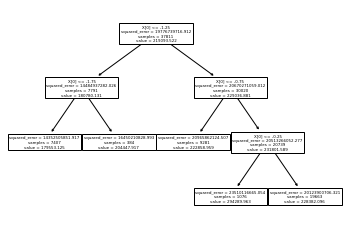

In [43]:
main()

In [43]:
# Cleary we can see the results are not great due to overfitting.
# Root Mean squared error: 141084.74 in linear regression, and accuracy scores are too low when this problem is modelled
# as regression problem.

# As a work around we modelled this problem as classification prblem by binning the salary data into three bins - 
# Low, Medium and High. All we are interested is the range of salary and not a precise value which is dependent on lot 
# of other factors.